In [3]:
import os
import numpy as np
import pandas as pd
import setuptools
try:
    import ROOT
    import root_numpy
except ImportError as e:
    warnings.warn("Error importing ROOT-related libraries: %s. "
                  "If you try to use ROOT-related functions, hax will crash!" % e)

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['image.cmap'] = 'viridis'


In [2]:
path="/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/"

In [4]:
elem_charge = 1.6021766e-19

def area_to_charge(a):
    # area in adc counts * 10 * ns
    factor = 2.25 * 10e-9 / (2**14 * 50) #  * elem_charge)
    return factor * (a / 10)

In [5]:
def process_ap_file(filename):
    #print("ok")
    file = ROOT.TFile(filename)
    #print("ok2")
    tree = file.Get('T1')
    #print("ok3")
    #pos = []
    area = []
    entropy = []

    #df = pd.DataFrame.from_records(root_numpy.root2array(filename).view(np.recarray),columns=["Area","Entropy", "Position"], coerce_float=True)
    
    #print(df.head())
    for event in tree:
        
        #
        #for p in event.Position:
         #   pos.append(p)
        if len(event.Area) > 0:
            for a in event.Area:
                area.append(a)
        if len(event.Entropy) > 0:        
            for e in event.Entropy:
                entropy.append(e)

    d = {#'time': np.array(pos),
        'area': np.array(area),
        'entropy': np.array(entropy)}
        
    df = pd.DataFrame(d)
    return df 

In [88]:
def fit_1_2PE_exp(x, N, mu, sigma, N2,N_noise,mu_n,sigma_n,N_exp,tau,c,N3, x_break,N2_exp,tau2):
    
    def func1(x,N, mu, sigma, N2,N_noise,mu_n,sigma_n,N_exp,tau,c):
        return (N*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma)) 
                + N2*np.exp(-(x-2*mu)*(x-2*mu)/(4*sigma*sigma))
                +N_noise*np.exp(-(x-mu_n)*(x-mu_n)/(2*sigma_n*sigma_n))
                +N_exp*np.exp(-(x-c)/tau))
    def func2(x,N, mu, sigma, N2,N3,N2_exp,tau2):
        return (N*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma)) 
                + N2*np.exp(-(x-2*mu)*(x-2*mu)/(4*sigma*sigma))
                +N2_exp*np.exp(-(x)/tau2)
                +N3*np.exp(-(x-3*mu)*(x-3*mu)/(6*sigma*sigma)))
    return np.piecewise(x,[x<x_break,x>=x_break],
                        [lambda x: func1(x,N, mu, sigma, N2,N_noise,mu_n,sigma_n,N_exp,tau,c),
                         lambda x: func2(x,N, mu, sigma, N2,N3,N2_exp,tau2)])
            #+N2_exp*np.exp(-x/tau2))

def gaus(x,N,mu, sigma):
    return N*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma)) 

def fit_logNorm(x, N_n, mu_n, sigma_n, S, M, N2):
    mu = np.exp(M+S**2/2)
    sigma = np.sqrt(np.exp(S**2+2*M)*(np.exp(S**2)-1))
    return (N_n*np.exp(-(x-mu_n)*(x-mu_n)/(2*sigma_n*sigma_n))
            + 1/(S*np.sqrt(2*np.pi)*x)*np.exp(-(np.log(x)-M)**2/(2*S**2))
            + N2*np.exp(-(x-2*mu)*(x-2*mu)/(4*sigma*sigma)))
            

    
def plot_n_fit(data_frame,pmt,func):
    plt.figure(figsize=(10,6))
    plt.xlabel('Area')
    plt.ylabel('counts')
    plt.title('PMT %d' % pmt)
    h,bin_edges,_=plt.hist( data_frame['area'], bins=800, range=((0, 800)), normed = False, log = True,histtype='step', stacked = False)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    dicti={'bin_centres': np.array(bin_centres),
            'h':np.array(h)}
    DF_fit=pd.DataFrame(dicti)
    DF_fit = DF_fit[(DF_fit['bin_centres']>30)&(DF_fit['bin_centres']<450)]
    res1 = curve_fit(gaus, DF_fit.bin_centres, DF_fit.h, p0=[10000,200, 100],maxfev = 15000)
    
    x_break=350
    res = curve_fit(func, bin_centres, h, p0=[res1[0][0],res1[0][1], res1[0][2],500, 50000,5,10,20000,15,50,100,350,500,35],maxfev = 150000)
    plt.plot(bin_centres, func(bin_centres, *res[0]))
    
    #res2 = curve_fit(fit_logNorm, bin_centres, h, p0=[res[0][4],res[0][5], res[0][6],10, 10,res[0][3]],maxfev = 150000)
    #plt.plot(bin_centres, fit_logNorm(bin_centres, *res2[0]))
    plt.show()

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf0_Gain0_Test_standard_600_300_600.root


/home/cristian/anaconda3/envs/pax/lib/python3.4/site-packages/scipy/optimize/minpack.py:601: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


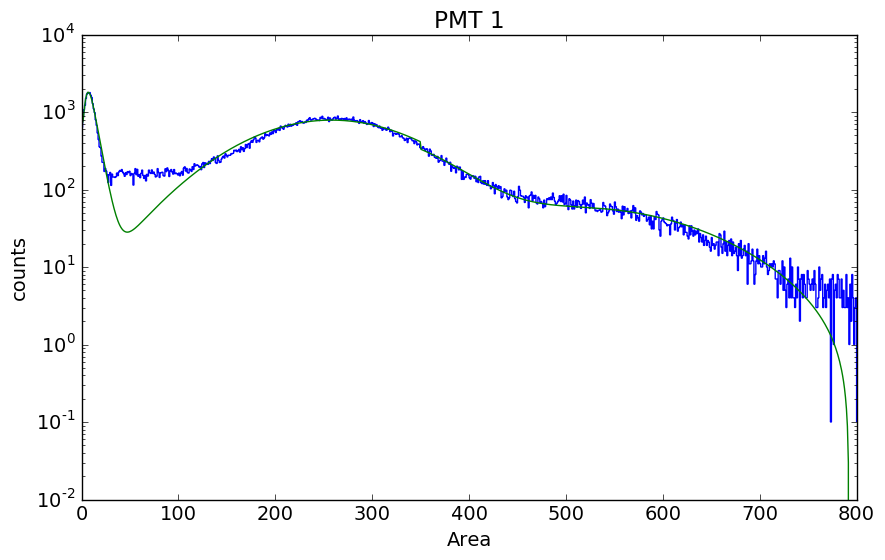

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf4_Gain0_Test_standard_600_300_600.root


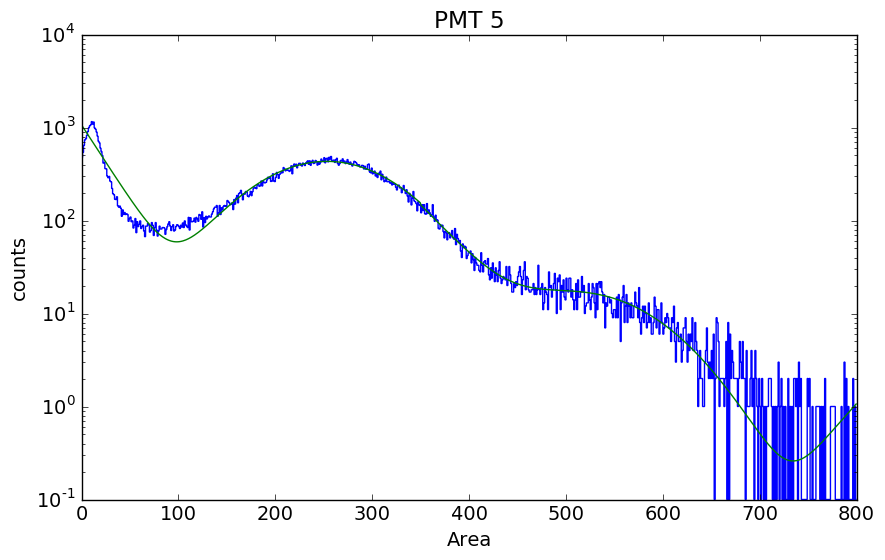

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf0_Gain1_Test_standard_600_300_600.root


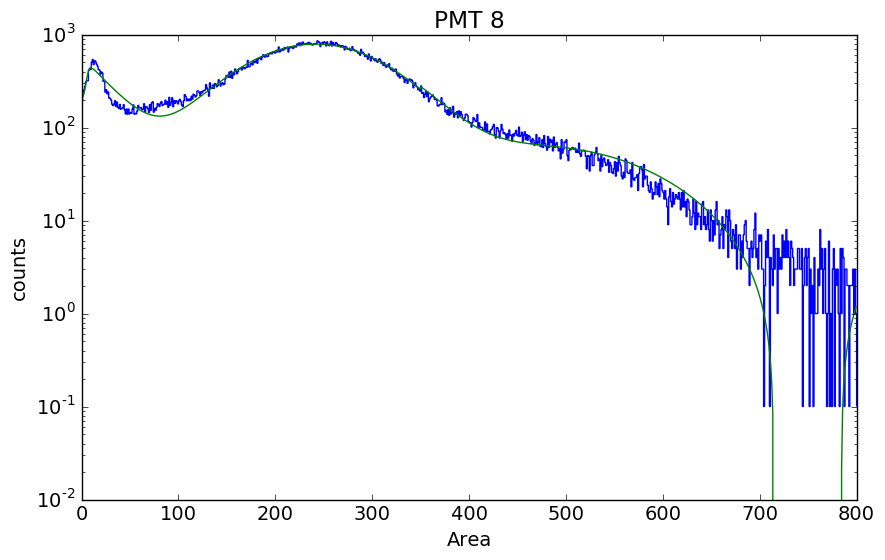

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf2_Gain0_Test_standard_600_300_600.root


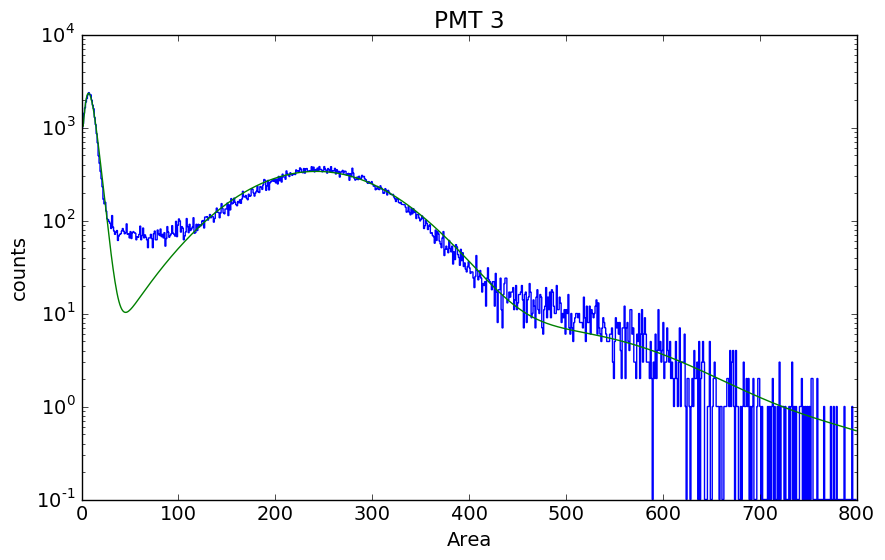

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf3_Gain0_Test_standard_600_300_600.root


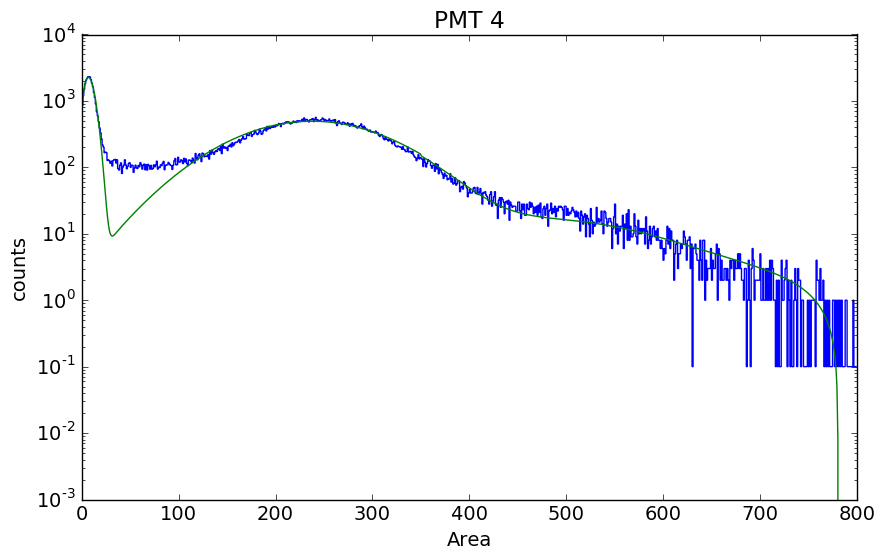

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf1_Gain1_Test_standard_600_300_600.root


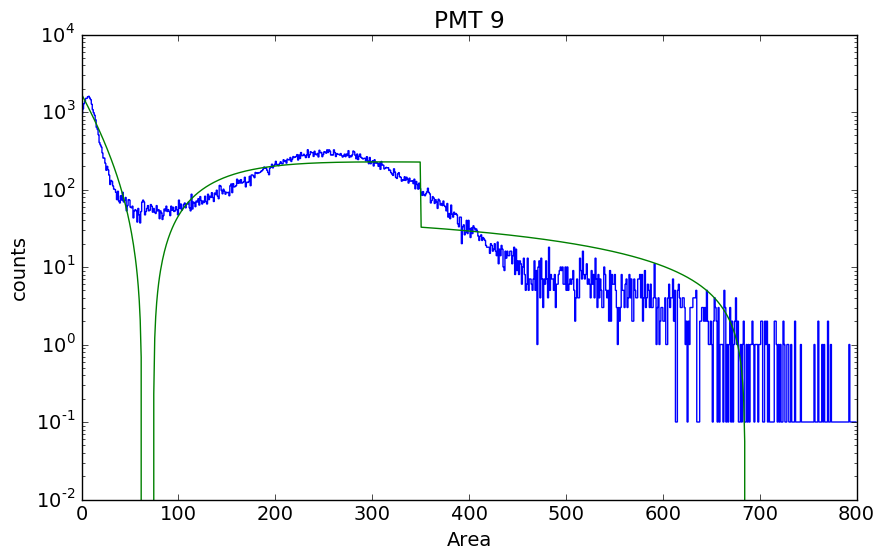

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf3_Gain1_Test_standard_600_300_600.root


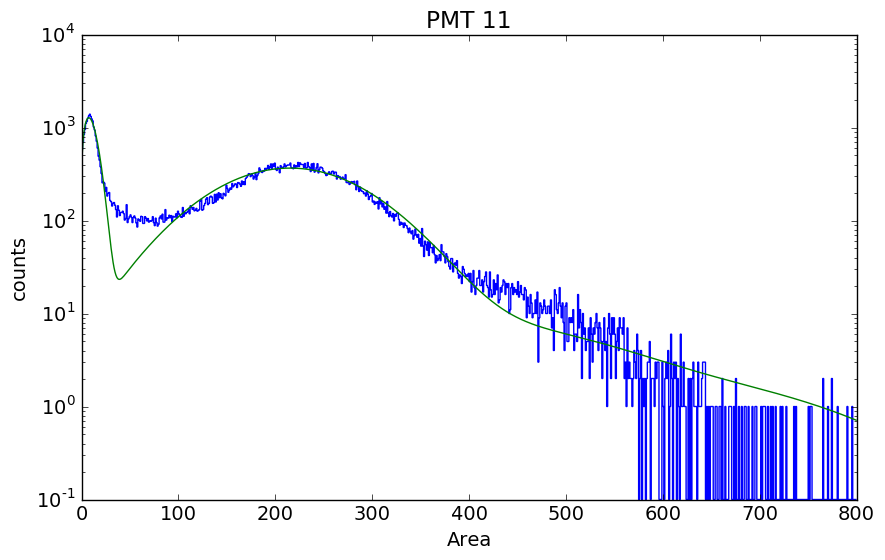

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf4_Gain1_Test_standard_600_300_600.root


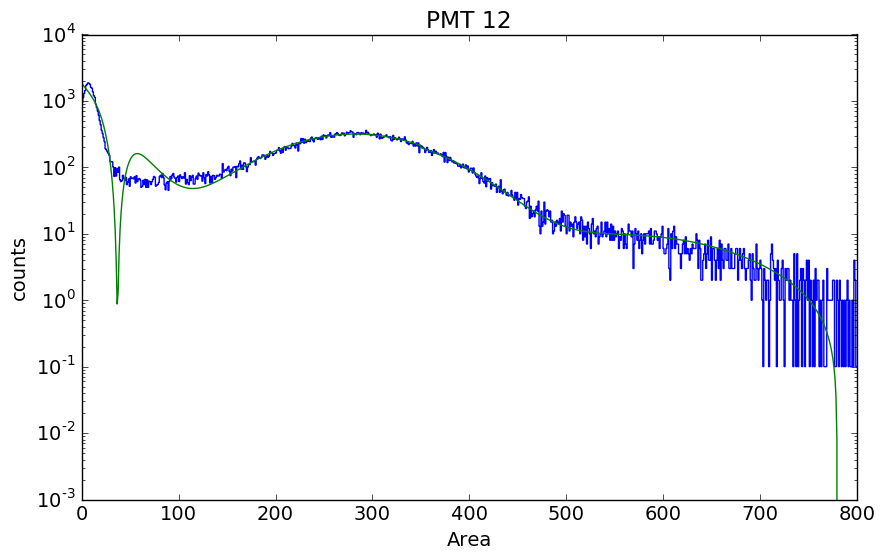

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf2_Gain1_Test_standard_600_300_600.root


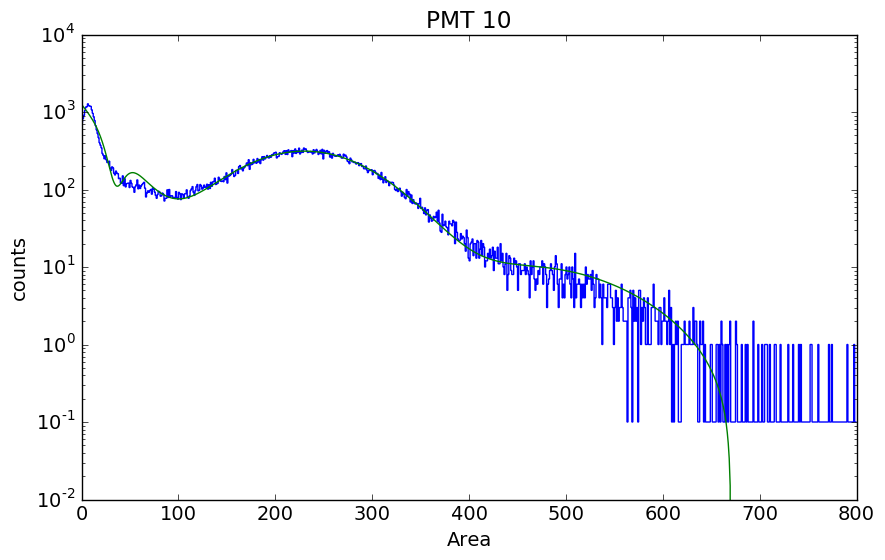

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf5_Gain1_Test_standard_600_300_600.root


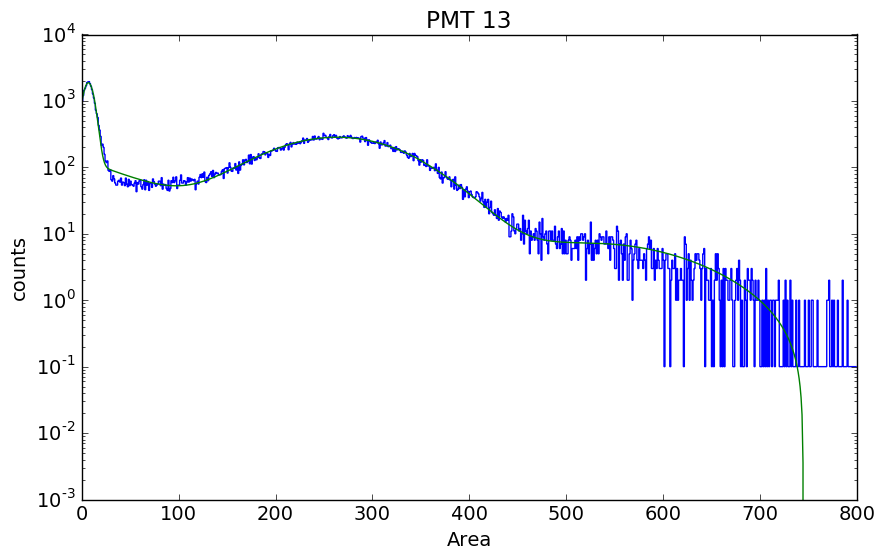

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf5_Gain0_Test_standard_600_300_600.root


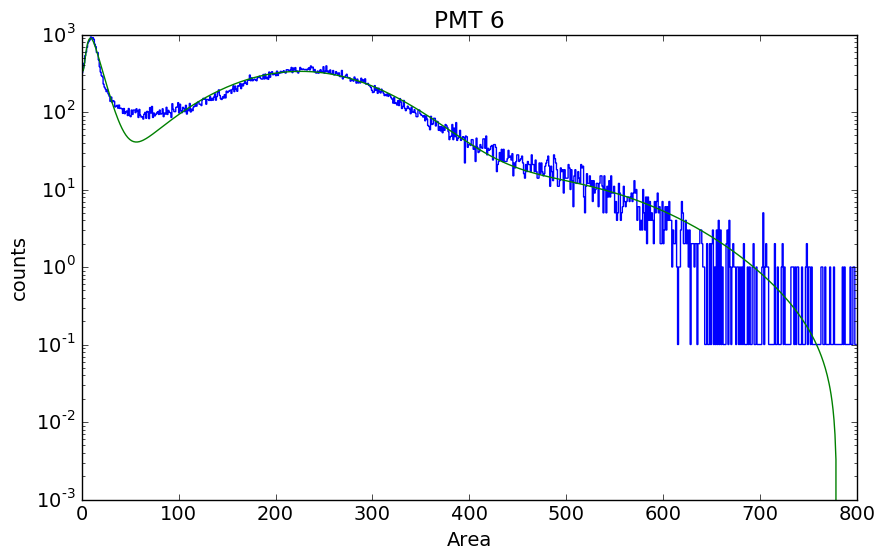

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf6_Gain1_Test_standard_600_300_600.root


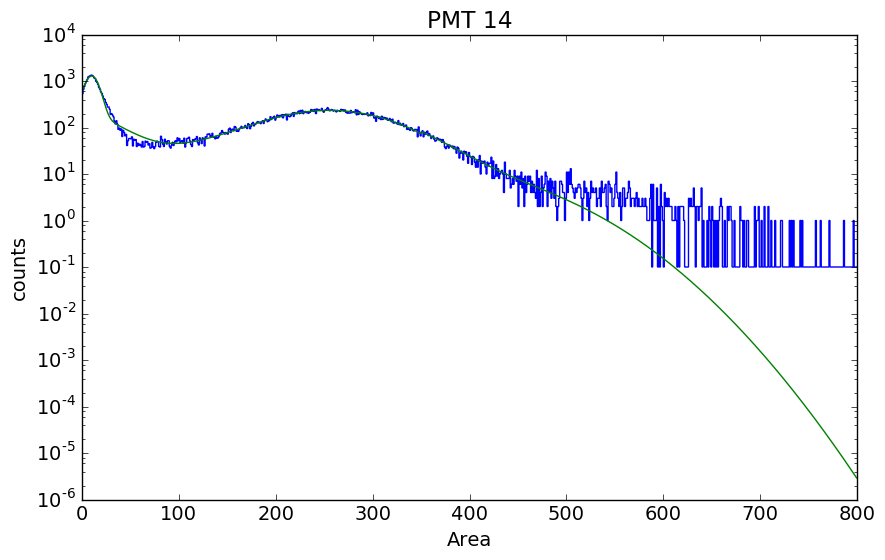

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf6_Gain0_Test_standard_600_300_600.root


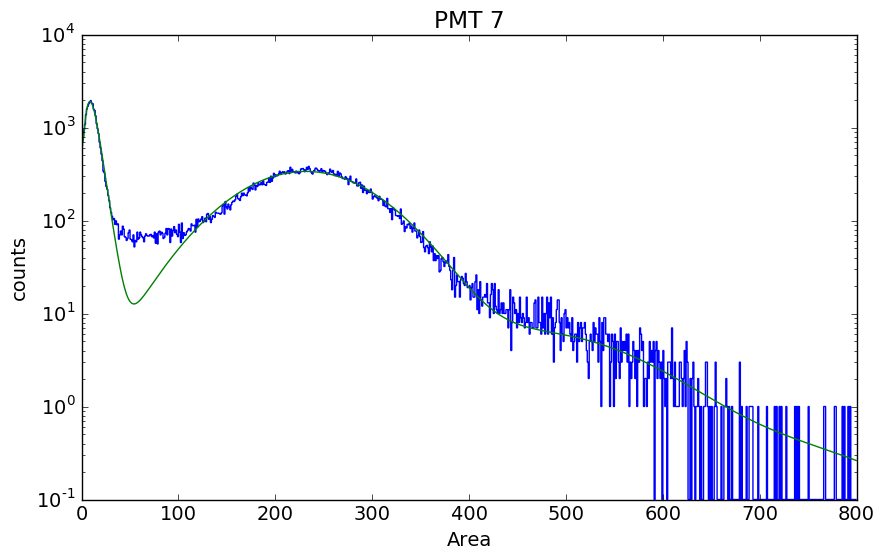

/home/cristian/Suxess_files/data/run5/liquid/gain_study/Alfredo_method/600-300-600_i3-10/processed_wf1_Gain0_Test_standard_600_300_600.root


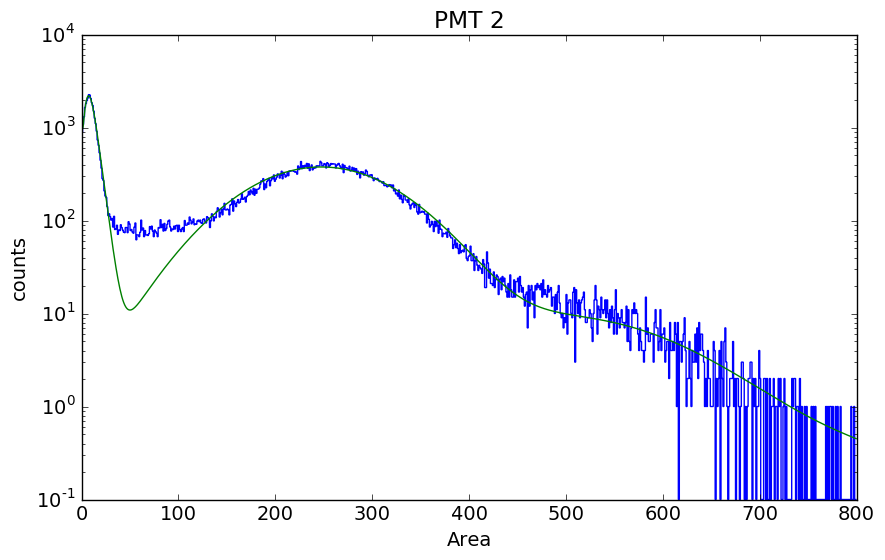

In [89]:
for file in os.listdir(path):
    if 'Figs' in file:
        continue
    print(path+file)
    #channel = int(file.split("_")[1].lstrip("wf"))
    #board = int(file.split("_")[2].lstrip("Board"))
    channel = int(file.split("_")[1].lstrip("wf"))
    board = int(file.split("_")[2].lstrip("Gain"))
    pmt = channel + 1 + board * 7
    #if pmt!=1:
    #    continue
    data = process_ap_file(path+file)
    data = data[(data['entropy']<0.7) & (data['area']>0)]
    plot_n_fit(data,pmt, fit_1_2PE_exp)